<a href="https://colab.research.google.com/github/AaronYounger/Machine-Learning/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

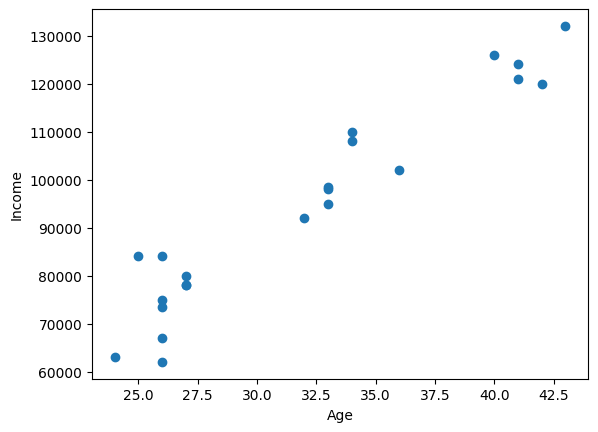

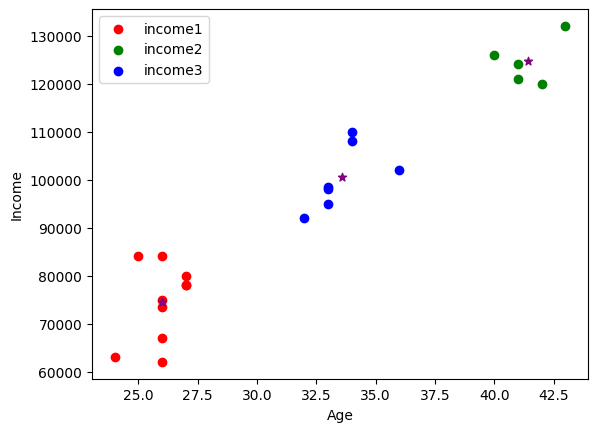

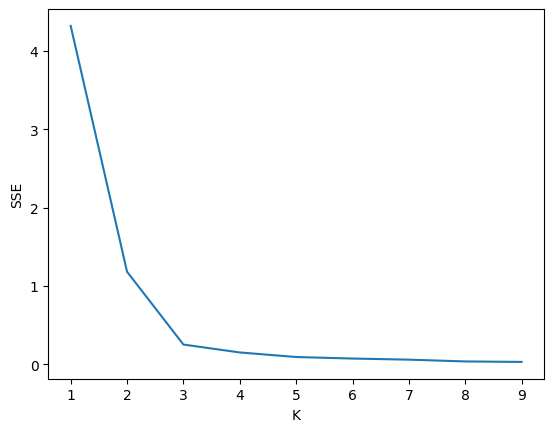

Optimal number of clusters: 3


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("data-01.csv")

## Three Clusters Shown in Scatterplot
plt.scatter(df.Age,df.Income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

km = KMeans(n_clusters=3)
km

y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

df['cluster'] = y_predicted
df.head()

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1.Income, color = 'red', label = 'income1')
plt.scatter(df2.Age, df2.Income, color = 'green', label = 'income2')
plt.scatter(df3.Age, df3.Income, color = 'blue', label = 'income3')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = "*")
plt.show()

## Normalize Using Min-Max

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

## Find Optimal Clusters

sse = []

for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income']])
  sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(range(1,10), sse)
plt.show()

print("Optimal number of clusters: 3")





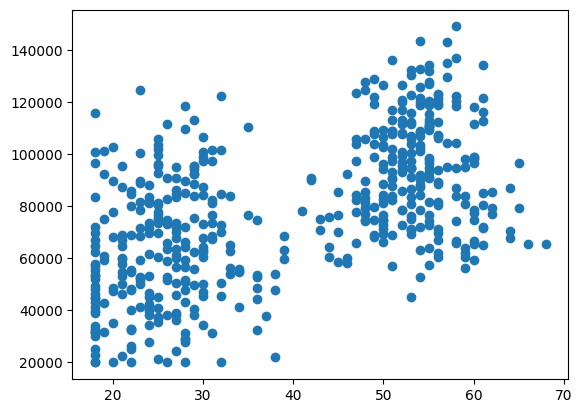

Optimal number of clusters:  2


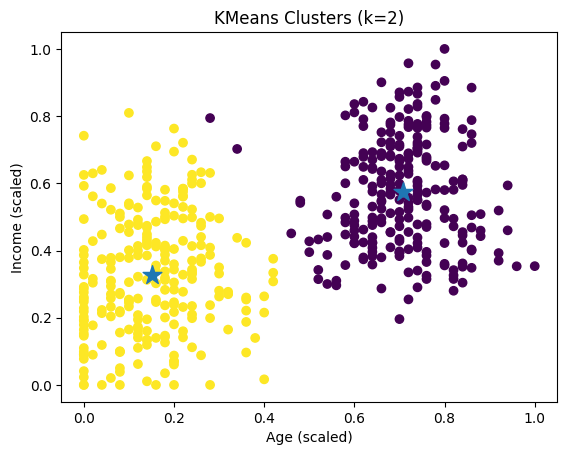

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Read Dataset
df = pd.read_csv('age_income_random_clusters_500.csv')
df.head()

# Plot Scatterplot
plt.scatter(df.age, df.income)
plt.show()

# Normalize Data using Min-Max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

# Find Optimal K Values

sse = []

for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(df[['age', 'income']])
  sse.append(km.inertia_)

!pip install kneed
from kneed import KneeLocator

k_values = range(1,10)

k1 = KneeLocator(k_values, sse, curve='convex', direction="decreasing")

optimal_k = k1.elbow
print("Optimal number of clusters: ", optimal_k)

km = KMeans(n_clusters=2)
km

y_predicted = km.fit_predict(df[['age', 'income']])
y_predicted

df['cluster'] = y_predicted
df.head()
df.tail()

plt.scatter(df['age'], df['income'], c=df['cluster'])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', s=200)
plt.xlabel('Age (scaled)')
plt.ylabel('Income (scaled)')
plt.title(f'KMeans Clusters (k={optimal_k})')
plt.show()


